A simple ML workflow:

Problem – What do we want to predict?
Data – Collect & clean data (you already learned EDA / cleaning).
Split – Train/Test split.
Choose a model – e.g., Decision Tree for classification.
Train – Fit the model on training data.
Predict – Make predictions on test data.
Evaluate – Compute metrics (accuracy, etc.).
Improve – Try better features, models, parameters.
Today we’ll walk through this with a simple example.

1. Problem

-signal
-iris
-features = 5 - 4 input features, 1 target feature
-150 rows - 50 for each specie
-a machine, model, that predicts species of a flower, by just knowing about:

    < x1,x2,x3,x4 > ---> X ( petal_length )
    < y > ---> y (species)

Libraries we know:

numpy pandas matplotlib seaborn plotly sklearn

In [1]:
import pandas as pd

#pip install scikit-learn

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

#import seaborn as sns
#import matplotlib.pyplot as plt
#import plotly.express as px


2. Data

-data acquisition (sklearn)
-EDA (data is clean)
    -cleaning
    -Visualization - insights
-feature selection

In [4]:
load_iris

<function sklearn.datasets._base.load_iris(*, return_X_y=False, as_frame=False)>

In [ ]:
iris = load_iris()

print(iris.keys())

#type(iris)

#feature selection
X = iris.data # x1 x2 x3 x4
y = iris.target # y

X , y = iris.data, iris.target
y

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
n_samples, n_features = iris.data.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])

Number of samples: 150
Number of features: 4
[5.1 3.5 1.4 0.2]


The information about the class of each sample is stored in the target attribute of the dataset:

In [30]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [31]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
import numpy as np

np.bincount(iris.target)

array([50, 50, 50])

Using the NumPy's bincount function (above), we can see that the classes are distributed uniformly in this dataset - there are 50 flowers from each species, where

class 0: Iris-Setosa
class 1: Iris-Versicolor
class 2: Iris-Virginica

These class names are stored in the last attribute, namely target_names:

In [34]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize one or two of the dimensions at a time using a simple histogram or scatter-plot. Again, we'll start by enabling matplotlib inline mode:

In [36]:
import matplotlib.pyplot as plt

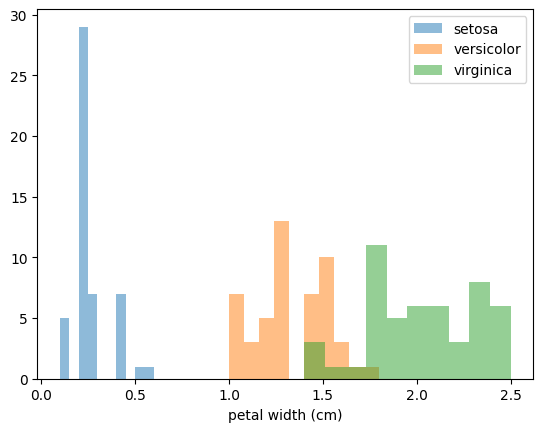

In [37]:
x_index = 3

for label in range(len(iris.target_names)):
    plt.hist(iris.data[iris.target==label, x_index], 
             label=iris.target_names[label],
             alpha=0.5)

plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show()

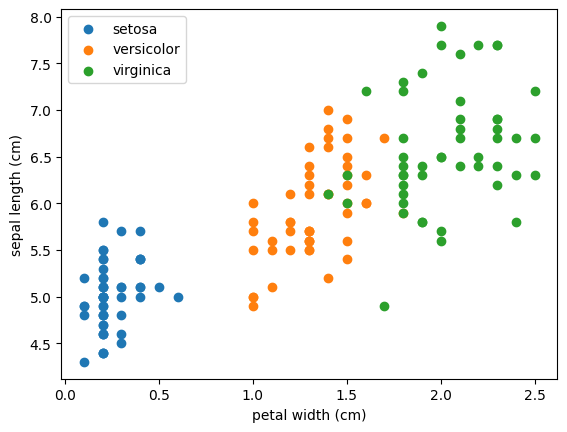

In [40]:
x_index = 3
y_index = 0

for label in range(len(iris.target_names)):
    plt.scatter(iris.data[iris.target==label, x_index], 
                iris.data[iris.target==label, y_index],
                label=iris.target_names[label])

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

An aside: scatterplot matrices

Instead of looking at the data one plot at a time, a common tool that analysts use is called the scatterplot matrix.

Scatterplot matrices show scatter plots between all features in the data set, as well as histograms to show the distribution of each feature.

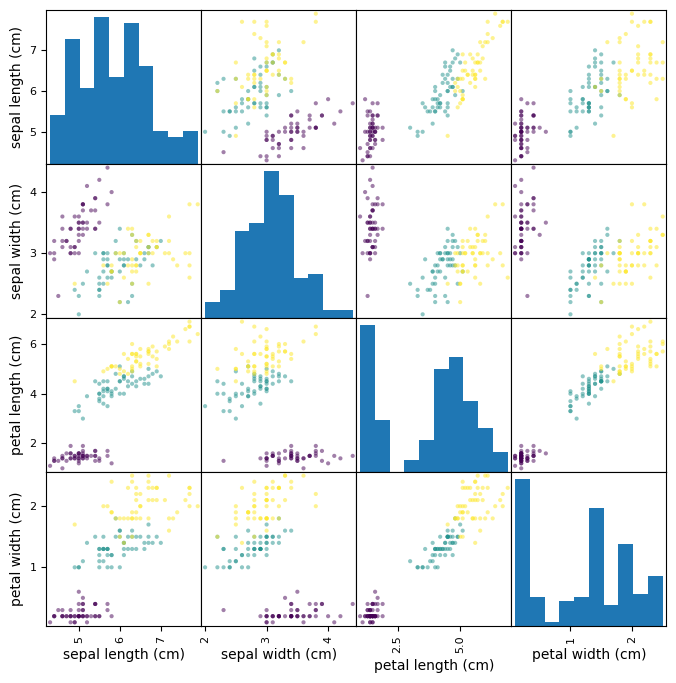

In [41]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8));

In [ ]:
X = pd.DataFrame(X, columns= iris.feature_names)

y = pd.DataFrame(y)

# df_y.pd.Dataframe(y)
# df_X['species'] = df_y

# df_X.info()
# df_X.describe()
# df_X.isnull().sum()


In [19]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [25]:
# Accessing the attributes
features = iris.data
target_labels = iris.target
feature_names = iris.feature_names
dataset_description = iris.DESCR
target_names = iris.target_names

# Printing some information
print(f"Feature names: {feature_names}")
print(f"Target names: {target_names}")
print(f"First 5 samples of features:\n{features[:5]}")
print(f"First 5 samples of target labels: {target_labels[:5]}")
# print(dataset_description) # Uncomment to view the full description


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First 5 samples of features:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 samples of target labels: [0 0 0 0 0]


3. Train Test Split

-train = 80% used for training
-test = 20% used for testing

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y)

In [40]:
y_train

array([1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2,
       2, 0])

In [ ]:
#total 150

len(X_train) #112 # x1, x2, x3, x4
len(y_train) #112 # y

len(X_test) #38 # x1, x2, x3, x4
len(y_test) #38 # y


38

4. Modeling
- select model - Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

5. Training

Fit my training data into Linear Regression
X_train, y_train
try to learn and identify patterns

In [34]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 6. Predictions

- own sepal length ...
- rest of the 20% that my model has never seen before
- try making predictions on that

In [38]:
y_predictions = model.predict(X_test)

In [45]:
#model.predict([[2,5,3,4]])



7. Accuracy

# closer it is to zero, better the performance 

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_predictions)
mae
r2 = r2_score(y_test, y_predictions) # 0.93
r2

-1.001963346571746

# 6. Test i/p predict & evaluate
-make prediction
-compute performance

In [52]:
y_pred = model.predict(X_test)
y_pred

array([ 1.80798297,  0.9663393 ,  2.21420832,  1.67307808,  0.05599897,
       -0.07641961,  0.10788587,  1.12965536,  1.58837128,  1.02511004,
        1.59143435,  1.7415752 , -0.12805147, -0.02213547,  1.43514046,
        1.36519574,  1.96805691,  1.83458674, -0.07597169,  1.31479453,
        1.7415752 ,  0.97219657,  1.27517129,  1.18737452,  1.30215894,
        1.4158408 , -0.03627058, -0.07208875, -0.00892311,  1.08282919,
       -0.05284007,  1.48956651,  1.38133114,  2.12920575, -0.04985299,
        0.18833968,  1.99897771, -0.01325397])

In [50]:

model.predict([[4.3 , 3.8, 2.4, 0.1]])

array([0.11704912])

In [48]:
iris
 

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  